In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
log_file = 'log.lammps'

def read_thermo_from_log(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    thermo_data = []
    capture = False
    headers = []

    for line in lines:
        line = line.strip()

        # Identify the header line
        if re.match(r"^Step\s+Temp\s+PotEng", line):
            headers = line.split()
            capture = True
            continue

        # Stop capturing if we reach a non-data line
        if capture:
            if not re.match(r"^\d", line):
                break
            thermo_data.append(line.split())

    # Convert to DataFrame
    df = pd.DataFrame(thermo_data, columns=headers)
    df = df.apply(pd.to_numeric)
    return df

thermo_data = read_thermo_from_log(log_file)
print(thermo_data.head())

   Step       Temp     PotEng     TotEng  c_press_comp[1]  c_press_comp[2]  \
0     0  93.933783 -8913741.4 -8887427.5       -17426.245       -14023.001   
1   200  46.610523 -8898934.7 -8885877.5       -17059.864       -13664.840   
2   400  52.466120 -8898225.8 -8883528.3       -16724.324       -13330.702   
3   600  59.796377 -8897473.2 -8880722.3       -16635.290       -13230.342   
4   800  65.070742 -8895779.6 -8877551.2       -16569.996       -13162.081   

   c_press_comp[3]  c_press_comp[4]  c_press_comp[5]  c_press_comp[6]  
0       -17366.533         0.449108       -170.14070         1.348463  
1       -17003.072        -1.342244       -181.15131         3.002984  
2       -16669.542        -1.934458       -172.40945         3.288772  
3       -16576.724        -4.061227       -174.70585         1.941788  
4       -16514.994        -4.359413       -176.66229         5.844402  


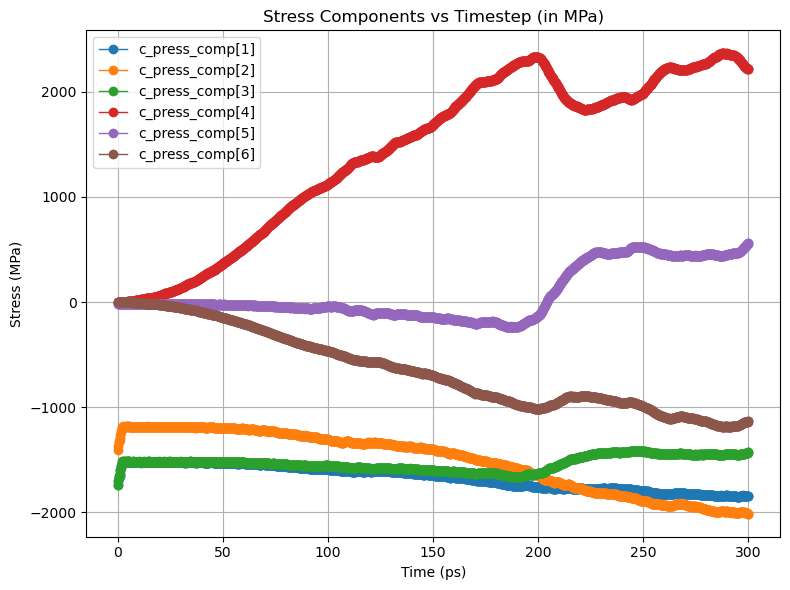

In [8]:
def plot_stress_components(df):
    """
    Plots all six stress components (converted from bar to MPa) vs Step.

    Parameters:
        df (pandas.DataFrame): LAMMPS thermo data with 'Step' and stress components.
    """
    stress_labels = [
        'c_press_comp[1]',  # σ_xx
        'c_press_comp[2]',  # σ_yy
        'c_press_comp[3]',  # σ_zz
        'c_press_comp[4]',  # σ_xy
        'c_press_comp[5]',  # σ_yz
        'c_press_comp[6]'   # σ_xz
    ]

    plt.figure(figsize=(8, 6))

    for label in stress_labels:
        if label in df.columns:
            # Convert bar → MPa
            plt.plot(df['Step'] * 0.001, df[label] * 0.1, label=label, marker='o', linewidth=1)

    plt.xlabel("Time (ps)")
    plt.ylabel("Stress (MPa)")
    plt.title("Stress Components vs Timestep (in MPa)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_stress_components(thermo_data)